# Deaths due to Accident and Injury in Iceland
# World Health Organization Data

**Author:** Thomas Body<br>
https://github.com/tombody

---
## Introduction

### Purpose of the Report

This report was prepared to analyse and interpret the data surrounding the issues of injuries, violence and mortality rates in Iceland. This is in line with the surveillance step of the World Health Organization (WHO) data based prevention and control of injuries and violence (WHO 2014).

### Research Questions

- What are the current leading causes of injury deaths in Iceland?

- Have injury deaths risen in rank over the last thirty years?

- Are some groups more vulnerable to injuries and violence than others?

- Does poverty increase the risk of injury?

### Injuries and Violence

More than five million people die every year as a result of injuries and violence, which accounts for roughly nine percent of the world's deaths (WHO 2014 p.5). To add to this, the number of non-fatal consequences of injuries and violence massively exceed those of fatal, with temporary or permanent disabilities caused by violence and injuries totalling an estimated six percent of the total years lived globally (WHO 2014 p.5). The effects of non-fatal injuries manifest themselves in a large number of consequences, both physical and mental in nature. These include road traffic injuries, homicide, suicide, drowning, burns, falls and the effects of war (WHO 2014 pp.8-9).

To help prevent the effects of injuries and violence, WHO has identified a need for evidence-based strategies, to be implemented globally for specific circumstances based on the needs each individual area (WHO 2014 p.15). A four step data based response to prevention and control has been put into use in a number of countries to this effect. 

<img src="Images/prevention_and_control.jpg"></img>

<strong><center><small>Figure 1 - Prevention and Control <br>(WHO 2014 p.15) </small></center></strong>

Of these four steps, this report focuses on the surveillance step, which is using data to understand the extent and nature of the injury or violence problem (WHO 2014 p.15).


### Background of Iceland

The Republic of Iceland is a large island located in Northern Europe, between the North Atlantic Ocean and the Greenland Sea. It shares no land borders with any other countries and has a total area of 103,000 square kilometres (CIA 2017b).

With a population of 339,747, Iceland ranks as the 178th most populous nation in the World (CIA 2017b). Half of the population resides in and around the capital, Reykjavik, in a mostly urbanized environment (CIA 2017b). The 2016 Gross Domestic Product (GDP) was 16.52 billion international dollars, which places Iceland as the 151st largest economy in the World (CIA 2017b).

On the Human Development Index (HDI), which takes into account economic, education, health, and general standard of living factors, Iceland ranks 9th, which places the country in the Very High Human Development group (UN Development Program 2017).

Iceland's WHO region code is _Eur HI_, which indicates that Iceland is in the region of Europe and is considered high income (WHO 2013).

### Key Statistics

These statistics are all taken from the Central Intelligence Agency (CIA) factbook website (CIA 2017b).

- _Median Age_: 36.3 years
- _Population Growth Rate_: 1.1% growth
- _Birth Rate_: 13.7 births per 1000 population
- _Death Rage_: 6.4 deaths per 1000 population
- _Life Expectancy_: 83.0 years
- _Health Expenditure_: 8.9% of GDP (2014)

---
## Datasets

### WHO Mortality Database

The WHO Mortality Database is a database of registered deaths compiled by WHO from data given by national authorities around the world (WHO 2015 p.2). The cause of each death is classified by the circumstances that led to death, which is done in accordance to the International Classification of Diseases (ICD). All of this information is collated into a number of Comma Separated Value (CSV) files, which can be found on the WHO Mortality Database website (WHO 2017c). These CSV files are named Morticd, and are numbered from 07 to 10, with 10 having a part 1 and part 2. Part 10 has been split due to its size. These files are continually updated with relevant data by WHO (WHO 2015).

### Country Codes

The WHO mortality database has a system where each country is given a four digit country code, which is used exclusively to identify the country in all of their datasets (WHO 2015). For Iceland, this number is _4160_.

### ICD Files

The ICD files are numbered from 07 to 10, are ordered by year. The relevant columns in the ICD files are as follows (WHO 2015):

- `Country`: The four digit country code.
- `Year`: The relevant year for the data.
- `List`: Identifies the ICD classification used.
- `Cause`: A four digit code that identifies the cause of death.
- `Sex`: The sex of the victim. 1 is male, 2 is female, 9 is unspecified.
- `Frmat`: The age group format for the breakdown of deaths.
- `Deaths#`: Identifies the age of adult deaths separated into 26 groups, where # is a number that ranges from 1 to 26. Note that _Deaths1_ totals the number of deaths for all ages.


### Causes of Death

Please refer to Appendix A for a list of codes for deaths classified as due to accident, injury or violence. Note that in places, accident, injury and violence deaths are referred to as external deaths. The list is separated into ICD revisions, with only the relevant revisions for this report being stated. Note that although the 7th and 8th revisions use the same accident _cause codes_, some of the accident _causes_ are different in each revision.

Iceland reports with list 104 under ICD10, and all of the cause codes in the Morticd10 part 1 and 2 files are reported as detailed list numbers rather than the normal accident codes. The detailed list codes for all external causes range from V00-Y89. The causes can be seen in Appendix A.


### Importing the data

The imported data comes following files:

- Morticd7.csv (Last updated Feb 2004)
- Morticd8.csv (Last updated Jul 2012)
- Morticd9.csv (Last updated Nov 2015)
- Morticd10_part1.csv (Last updated Nov 2015)
- Morticd10_part2.csv (Last updated Nov 2015)

Each file is imported into a separate dataframe, which is named after the relevant ICD revision. These are then joined into three separate dataframes.

- `icd_all`: contains the data from every file.
- `icd_789`: contains the data from revisions 7, 8 and 9.
- `icd_10`: contrains the data from revision 10 part 1 and 2.

Three more dataframes are made from these with only information for Iceland.

- `icd_all_isl`
- `icd_789_isl`
- `icd_10_isl`


In [1]:
import pandas as pd

# Imports all of the files into dataframes.
icd7 = pd.read_csv("Project_Files/Morticd7.csv", dtype={'SubDiv':object})
icd8 = pd.read_csv("Project_Files/Morticd8.csv",dtype={'SubDiv':object})
icd9 = pd.read_csv("Project_Files/Morticd9.csv",dtype={'SubDiv':object})
icd10_1 = pd.read_csv("Project_Files/Morticd10_part1.csv",dtype={'List':object})
icd10_2 = pd.read_csv("Project_Files/Morticd10_part2.csv",dtype={'SubDiv':object,'List':object})

In [2]:
# Converts the Year column to datetime.
icd7['Year'] = pd.to_datetime(icd7['Year'], format='%Y')
icd8['Year'] = pd.to_datetime(icd8['Year'], format='%Y')
icd9['Year'] = pd.to_datetime(icd9['Year'], format='%Y')
icd10_1['Year'] = pd.to_datetime(icd10_1['Year'], format='%Y')
icd10_2['Year'] = pd.to_datetime(icd10_2['Year'], format='%Y')

In [3]:
# Combines all the ICD dataframes into a single dataframe.
icd_all = pd.concat([icd7,icd8,icd9,icd10_1,icd10_2])

# Combines the data from ICD dataframes for revisions 7, 8 and 9.
icd_789 = pd.concat([icd7,icd8,icd9])

# Combines the data from ICD dataframes for revision 10 part 1 and 2.
icd_10 = pd.concat([icd10_1,icd10_2])

# Creates dataframes with only information for Iceland.
icd_all_isl = icd_all[icd_all['Country']==4160]
icd_789_isl = icd_789[icd_789['Country']==4160]
icd_10_isl = icd_10[icd_10['Country']==4160]

### Accident and Injury code lists

For the 7th, 8th and 9th ICD code revisions, lists containing all the cause codes have been made to filter the dataframes by. For the 10th revision, the cause codes need to be searched for any that contain a _V_, _W_, _X_ or _Y_. This is due to the detailed codes being used in the cause column of the data.


In [4]:
# Creates a list of accident cause codes for each icd revision.
acc_code_7A_8A=['A138','A139','A140','A141','A142','A143','A144',
                'A145','A146','A147','A148','A149','A150']
acc_code_7B_8B=['B047','B048','B049','B050']
acc_code_9=['B47','B470','B471','B472','B473','B474','B479',
            'B48','B480','B481','B482','B49','B50','B51',
            'B52','B520','B521','B522','B523','B524','B529',
            'B53','B54','B55','B56','B560','B561','B569', 'CH17']

# Creates a list of accident cause codes for ICD revisions 7,8 and 9.
acc_code_789 = acc_code_7A_8A+acc_code_7B_8B+acc_code_9

### Leading Causes of Death in Iceland

Before investigating the research questions, we can look at the overall leading causes for all deaths in Iceland.

The column *Deaths1* is a total for all deaths irrespective of age. This column should be sorted by ascending value.

There are a number of cause codes that need to be excluded, as they collate the number of deaths for all causes. These are A000, B000, B00, and AAA.

In [5]:
# Creates a database with all death causes 
# except for A000, B000, B00 and AAA.
all_deaths_isl = icd_all_isl[-icd_all_isl['Cause'].isin(['A000','B000','B00','AAA'])]

# Creates a dict of the number one cause of death for each year.
deaths_types_year = {}
for year in set(all_deaths_isl['Year']):
    deaths_types_year[year] = all_deaths_isl[all_deaths_isl['Year']==year].sort_values(by="Deaths1", ascending=False).head(1)
    deaths_types_year[year] = deaths_types_year[year][['List','Cause']].values

# Creates a dataframe of all the list convention type 
# and cause code by date.
deaths_types_year_df = pd.DataFrame.from_dict(deaths_types_year, orient='index')
deaths_types_year_df.columns=['List/Cause']
deaths_types_year_df

,List/Cause
1957-01-01,"[[07A, A081]]"
1999-01-01,"[[104, I219]]"
1952-01-01,"[[07A, A081]]"
1969-01-01,"[[07A, A081]]"
1963-01-01,"[[07A, A081]]"
1996-01-01,"[[104, I219]]"
1959-01-01,"[[07A, A081]]"
2003-01-01,"[[104, I219]]"
2006-01-01,"[[104, I251]]"
1989-01-01,"[[09B, B27]]"


From this data, we can see that there are only a small number of re-occurring codes, which we can see in Table 1.

|List|Code|Cause |
|:---|:---|:-----|
|07A |A070|Vascular lesions affecting central nervous system|
|07A |A081|Arteriosclerotic and degenerative heart disease|
|08A |A083|Ischaemic heart disease|
|09B |B27 |Ischaemic heart disease|
|104 |I219|Acute myocardial infarction, unspecified|
|104 |I251|Atherosclerotic heart disease|

<strong><center><small>Table 1 - List of top causes of death from 1951-2009 <br>(WHO 2017b)</small></center></strong>

The overwhelming common theme amongst these causes is heart disease. This was to be expected, as worldwide, heart disease is the number cause of death (WHO 2017a). 

It should also be noted that from the ICD revisions that were used.

|Years Used |Revision|
|:----------|:-------|
|1951-1970  |07A     |
|1971-1980  |08A     |
|1981-1995  |09B     |
|1996-2009  |104     |

<strong><center><small>Table 2 - ICD revisions used in Iceland</small></center></strong>



### Functions

The following functions are used throughout the analysis section. They filter for external deaths and for accidental deaths. Note that the external deaths function is only used for datasets involving Iceland, as other countries have different ICD convention reporting cause codes.

In [6]:
""" Finds the and sorts the causes of all deaths for a given year.
    Removes all cause codes that total deaths.

    Args:
        df (df)   : A dataframe already sorted for a single country.
        year (str): The required year of inquiry.
        
    Returns: 
        Series: The top 20 causes of deaths sorted
        descending by number of deaths.
"""
def deaths_all(df, year):
    year_df = df[df['Year']==year]
    year_df = year_df[-year_df['Cause'].isin(['A000','B000','B00','AAA'])]
    grouped_df = year_df.groupby(by="Cause").sum().sort_values(by="Deaths1", ascending=False)
    return grouped_df['Deaths1']

In [7]:
""" Finds the and sorts causes of deaths due to injury or accident
    for a given year. Removes all cause codes that total deaths.

    Args:
        df (df)   : A dataframe already sorted for a single country.
        year (str): The required year of inquiry.
        
    Returns: 
        Series: Causes of deaths sorted by descending by number 
        of deaths.
"""
def deaths_ext(df, year):
    year_df = df[df['Year']==year]
    year_df = year_df[-year_df['Cause'].isin(['A000','B000','B00','AAA'])]
    
    # Different sorting methods depending on the year.
    if year < '1996':
        grouped_df = year_df[year_df['Cause'].isin(acc_code_789)]
    elif year >= '1996':
        grouped_df = year_df[year_df['Cause'].str.contains('V|W|X|Y')]
        
    grouped_df = grouped_df.groupby(by="Cause").sum().sort_values(by="Deaths1", ascending=False)
    return grouped_df['Deaths1']

---
## Analysis & Discussion

### What are the current leading causes of injury deaths in Iceland?

To answer this question, the most current year's data was used. For Iceland, the latest year was 2009. Therefore only the `icd_10_isl` dataframe was needed.

In [8]:
# Filtering the dataframe to only include 
# external (accident and injury) deaths.
deaths_ext_isl = icd_10_isl[icd_10_isl['Cause'].str.contains('V|W|X|Y')]

# Filtering for just 2009.
deaths_ext_isl_2009 = deaths_ext_isl[deaths_ext_isl['Year']=='2009']

# Grouping by causes so that all sexes are summed.
causes_ext_2009 = deaths_ext_isl_2009.groupby(by='Cause').sum().sort_values(by='Deaths1', ascending=False)

causes_by_deaths = causes_ext_2009['Deaths1']
causes_by_deaths.head(5)

Cause
X709    14
W199    13
X590    12
Y119    10
X619     5
Name: Deaths1, dtype: int64

#### The Top 5 causes of Death by Accident or Injury

The causes for the top five causes of death by accident or injury are listed below.

|Code|Cause|
|:---|:----|
|X709|Intentional self-harm by hanging, strangulation and suffocation|
|W199|Unspecified fall|
|X590|Exposure to unspecified factor causing fracture|
|Y119|Poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified, undetermined intent|
|X619|Intentional self-poisoning|

<strong><center><small>Table 3 - The Top 5 causes of Death by Accident or Injury</small></center></strong>

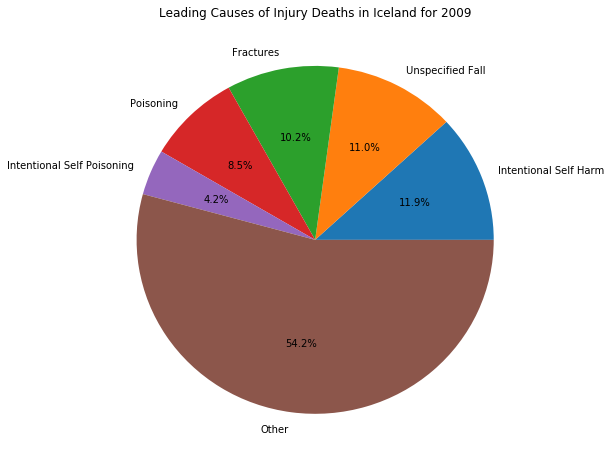

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline 

# Creates a list of causes from the codes. Includes value for Other.
causes = ['Intentional Self Harm'
          ,'Unspecified Fall'
          ,'Fractures'
          ,'Poisoning'
          ,'Intentional Self Poisoning'
          ,'Other']

# Creates a list of deaths, includes value for Other.
deaths = list(causes_by_deaths[0:5])
other_deaths = sum(causes_by_deaths[5:])
deaths.append(other_deaths)

# Displays a pie chart of the most common causes for external deaths.
fig = plt.figure(figsize=(8,8))
plt.pie(deaths, labels=causes, autopct='%.1f%%')
plt.title("Leading Causes of Injury Deaths in Iceland for 2009")
plt.show()

<strong><center><small>Chart 1 - Leading Causes of Injury Deaths in Iceland for 2009</small></center></strong>

#### Discussion

The current leading causes of injury deaths in Iceland for 2009 are, in order:

- Intentional self-harm by hanging, strangulation and suffocation, 
- Unspecified fall,
- Exposure to unspecified factor causing fracture,
- Poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified, - undetermined intent,
- Intentional self-poisoning.

This is however, in accordance with how WHO classify their data. The classification groups could be sorted differently depending on different requirements. For instance, intentional self poisoning and intentional self harm could be combined into a single group. Another instance is that all of the transport accident classifications could be grouped together.

In [10]:
# Groups all of the transport accident codes together.
sum(causes_by_deaths[causes_by_deaths.index.str.contains('V')])

13

The total number of traffic accidents in Iceland in 2009 was 13, which is 11% of the total, equal with the number of deaths unspecified falls. If it were placed in the preceding list, it would rank equal second. Thus,  how this data is interpreted is dependent on the nature of the question being asked.

---
### Have injury deaths risen in rank over the last thirty years?

To answer this question, the last thirty years of data was looked at starting at 1979 and going up in fifteen year increments. The data from 1979, 1994, and 2009 was analysed.

In [11]:
# Creates a dataframe for all deaths from 1979.
top_20_1979 = deaths_all(icd_789_isl, '1979').head(20)
top_20_1979

Cause
A083    471
A085    155
A092    108
A058     82
A051     50
A047     42
433      40
431      38
A147     30
A138     28
A084     27
A093     26
A054     25
A048     23
A086     22
A079     22
153      21
A060     21
157      20
A087     19
Name: Deaths1, dtype: int64

In [12]:
# Creates a dataframe for all deaths from 1994.
top_20_1994 = deaths_all(icd_789_isl, '1994').head(20)
top_20_1994

Cause
B27     467
B270    298
B32     212
B29     184
B279    169
B09     130
B321    130
B28     102
B10     101
B101     96
B12      84
B293     82
B289     67
420+     66
B292     62
B323     53
B11      47
B34      43
B13      43
B22      39
Name: Deaths1, dtype: int64

In [13]:
# Creates a dataframe for all deaths from 2009.
top_20_2009 = deaths_all(icd_10_isl, '2009')
top_20_2009.head(20)

Cause
I251    137
C349    129
I219    124
G309     92
I64      64
I259     64
C61      53
I509     53
J449     52
J189     49
C189     48
C509     36
J440     36
G20      31
F03      30
C259     29
C719     27
I639     26
I48      25
I110     25
Name: Deaths1, dtype: int64

In [14]:
# Shows the number of deaths for the top 20 
# causes of death in 1979, 1994 and 2009.
print("Deaths in 1979: ", sum(top_20_1979.head(20)))
print("Deaths in 1994: ", sum(top_20_1994.head(20)))
print("Deaths in 2009: ", sum(top_20_2009.head(20)))

Deaths in 1979:  1270
Deaths in 1994:  2475
Deaths in 2009:  1130


For a list of causes by death code see Appendix A.

To see how the top ten leading causes of deaths due to accident and injury have changed over the last 30 years, a time series graph with data in five year increments, along with the relevant dataframe, has been created below. The starting year is 1979 and ends in 2009.

In [15]:
# A list of years required for time series graph.
time_series_years = ['1979','1984','1989','1994','1999','2004','2009']

In [16]:
# Creates a dictionary with the key:year, 
# value:number of external deaths from top 10 causes.
deaths_ext_years = {}
for year in time_series_years:
    deaths_ext_years[year]=sum(deaths_ext(icd_all_isl,year).head(10))

deaths_ext_years

{'1979': 140,
 '1984': 178,
 '1989': 151,
 '1994': 117,
 '1999': 36,
 '2004': 45,
 '2009': 69}

In [17]:
# Creates a dataframe of deaths by years.
deaths_years_df = pd.DataFrame.from_dict(deaths_ext_years, orient='index')
deaths_years_df.columns=['Deaths']

deaths_years_df

,Deaths
1979,140
1984,178
1989,151
1994,117
1999,36
2004,45
2009,69


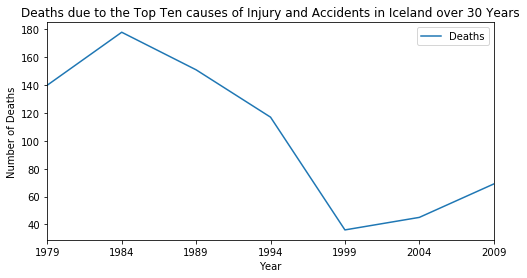

In [18]:
# Plots a time series graph of the number of deaths 
# due to accident and injury.
deaths_years_df.plot(figsize=(8,4))
plt.title("Deaths due to the Top Ten causes of Injury and Accidents in Iceland over 30 Years")
plt.ylabel("Number of Deaths")
plt.xlabel("Year")
plt.show()

<strong><center><small>Chart 2 - Deaths due to the Top Ten causes of Injury and Accidents in Iceland over 30 Years for Iceland.</small></center></strong>

#### Discussion

As we can see from chart 2, the number of injury related causes rose from 1979 to 1984 and then dropped significantly until 1999 before starting to rise again. Almost the entire number of total deaths from accident or injuries occurs in the top ten causes, thus increasing the number of causes does will not significantly change the time series. However, there were multiple changes to ICD revision codes used to classify deaths over this 30 year period. For instance, there are a much larger number of codes used in revisions 104 for accidents and injuries then there was for revision 07A. It is possible that the change over time that is seen in chart 2 may be due to these effects rather than a change in numbers. Only using the information we have analysed in this report however, it would seem that the number of injury and accidental deaths has decreased over the 30 year period.



---
### Are some groups more vulnerable to injuries and violence than others?

The top five leading causes of death for injury and accident in Iceland for 2009 are:

|Code|Deaths|Cause|
|:---|:-----|:----|
|X709|14    |Intentional self-harm by hanging, strangulation and suffocation  |
|W199|13    |Unspecified fall|
|X590|12    |Exposure to unspecified factor causing fracture|
|Y119|10    |Poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified, undetermined intent|
|X619|5     |Intentional self-poisoning|

<strong><center><small>Table 4 List of top causes of death from 2009 </small></center></strong>

Three groups have been chosen to see if some groups are more vulnerable to deaths from accident and injury than others. These three groups are:

- Youths aged 15-29, any gender.
- Males, all ages.
- Females, all ages.

The columns `Deaths9`, `Deaths10`, and `Deaths11` contain information for the required age range.

For the column `sex`, `1` is for male, `2` is for female, and `9` is for unspecified (WHO 2015 p.3).

In [19]:
# A list of the top 5 cause codes of 
# death by accident or injury for 2009.
codes_2009 = ['X709','W199','X590','Y119','X619']

# Creates a pivot table for deaths for youths indexed by cause.
youths_2009 = icd_10_isl[icd_10_isl['Year']=='2009']
youths_2009 = youths_2009[youths_2009['Cause'].isin(codes_2009)]

# Creates a column for deaths of youths aged 15-29 and makes them ints.
youths_2009['Deaths_youth']=youths_2009['Deaths9']+youths_2009['Deaths10']+youths_2009['Deaths11']
youths_2009['Deaths_youth'] = youths_2009['Deaths_youth'].astype(int)

youths_2009_pt = youths_2009.pivot_table('Deaths_youth', index='Cause', aggfunc="sum")
youths_2009_pt


,Deaths_youth
Cause,
W199,0
X590,0
X619,1
X709,2
Y119,2


In [20]:
# Creates a pivot table for deaths split by gender 
# and index by cause for all ages.
gender_2009 = icd_10_isl[icd_10_isl['Year']=='2009']
gender_2009 = gender_2009[gender_2009['Cause'].isin(codes_2009)]
gender_2009_pt = gender_2009.pivot_table("Deaths1", index="Cause", columns="Sex", aggfunc="sum")
gender_2009_pt

Sex,1,2
Cause,,
W199,6,7
X590,6,6
X619,3,2
X709,12,2
Y119,5,5


In [21]:
# Merges pivot tables into a single dataframe.
total_2009_pt = pd.concat([youths_2009_pt,gender_2009_pt], axis=1)
total_2009_pt.columns=['Youths', 'Males', 'Females']
total_2009_pt

,Youths,Males,Females
Cause,,,
W199,0,6,7
X590,0,6,6
X619,1,3,2
X709,2,12,2
Y119,2,5,5


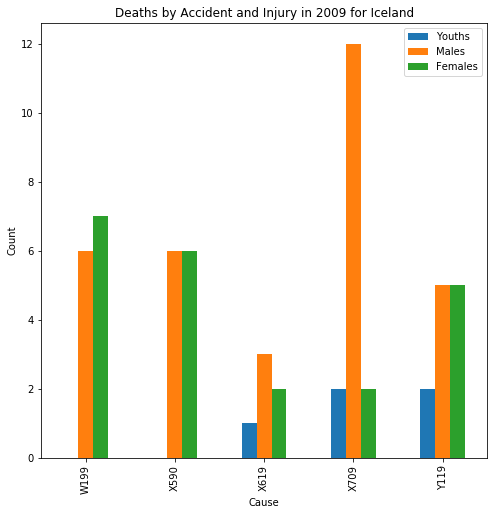

In [22]:
# Creates a vertical bar chart of the 
# deaths by accident and injury in 2009 for Iceland.
total_2009_pt.plot(kind='bar', figsize=(8,8))
plt.title("Deaths by Accident and Injury in 2009 for Iceland")
plt.ylabel("Count")
plt.show()

<strong><center><small>Chart 3 - Deaths by Accident and Injury in 2009 for Iceland</small></center></strong>

#### Discussion

We can see from chart 3 that there are some significant differences between groups. W199, falls, and X590, fractures, have no youth deaths. This is expected, as a fall or fracture can be fatal later in life, and is generally non-fatal for younger people. Overall, youths are generally dying less from accident and injury than people of all ages.

There is also a much larger number of males dying from X709, intentional self-harm by hanging, strangulation and suffocation, over all ages. Thus, it can be stated that there is evidence that some groups are more vulnerable to deaths from injury, accident and violence than others.

---
### Does poverty increase the risk of injury?

Iceland is considered a High Income country located in Europe, so to compare the risk of death from accident and injury to poverty levels, a country from Europe with a Low to Medium Income was selected. The country selected was Albania. 

Some key statistics of the two countries are as follows.

|Statistic          |Iceland|Albania  |
|:------------------|:------|:--------|
|Income Code        |Eur-HI |Eur-LMI  |
|Country Code       |4160   |4005     |
|Population         |339,747|3,047,987|
|GDP-Per Capita Rank|28     |128      |
|HDI                |9      |75       |

<strong><center><small>Table 5 - Iceland vs Albania Key Stats <br> (CIA 2017a, 2017b; WHO 2013; UN Development Program 2017)
</small></center></strong>

Using these figures, the population of Albania is 8.97 times larger than that of Iceland.

In [23]:
# The top 20 deaths for all causes for Iceland in 2009.
isl_2009_all = deaths_all(icd_all_isl, '2009')
isl_2009_all.head(20)

Cause
I251    137
C349    129
I219    124
G309     92
I64      64
I259     64
C61      53
I509     53
J449     52
J189     49
C189     48
C509     36
J440     36
G20      31
F03      30
C259     29
C719     27
I639     26
I48      25
I110     25
Name: Deaths1, dtype: int64

|Code |Cause|
|:----|:----|
|I251 |Atherosclerotic heart disease  |
|C349 |Malignant neoplasm: Bronchus or lung, unspecified  |
|I219 |Acute myocardial infarction, unspecified  |
|G309 |Alzheimer's disease, unspecified  |
|I64  |Stroke, not specified as haemorrhage or infarction|
|I259 |Chronic ischaemic heart disease, unspecified  |
|C61  |Malignant neoplasm of prostate  |
|I509 |Heart failure, unspecified  |
|J449 |Chronic obstructive pulmonary disease, unspecified  |
|J189 |Pneumonia, unspecified  |
|C189 |Malignant neoplasm: Colon, unspecified  |
|C509 |Malignant neoplasm: Breast, unspecified  |
|J440 |Chronic obstructive pulmonary disease with acute lower respiratory infection  |
|G20  |Parkinson's disease  |
|F03  |Unspecified dementia  |
|C259 |Malignant neoplasm: Pancreas, unspecified  |
|C719 |Malignant neoplasm: Brain, unspecified  |
|I639 |Cerebral infarction, unspecified  |
|I48  |Atrial fibrillation and flutter  |
|I110 |Hypertensive heart disease with (congestive) heart failure  |

<strong><center><small>Table 6 - ICD10 Codes and Causes for Top 20 deaths in Iceland for 2009 <br> (WHO 2016)
</small></center></strong>

In [24]:
# A dataframe filtered for Albania.
icd_all_alb = icd_all[icd_all['Country']==4005]

# The top 20 deaths for all causes for Albania in 2009.
alb_2009_all = deaths_all(icd_all_alb, '2009')
alb_2009_all.head(20)

Cause
B29     3503
B27     2964
B291    2826
B270    2413
B28     2260
B46     1639
B465    1253
CH17     891
B09      834
B10      715
B101     608
B279     551
B32      462
B292     373
B12      346
B091     302
B30      302
B34      285
B11      237
B35      213
Name: Deaths1, dtype: int64

|Code |Cause|
|:----|:----|
|B29  |Cerebrovascular disease|
|B27  |Ischaemic heart disease|
|B291 |Intracerebral and other intracranial haemorrhage|
|B270 |Acute myocardial infarction|
|B28  |Diseases of pulmonary circulation and other forms of heart disease|
|B46  |Signs, symptoms and ill-defined conditions|
|B465 |Senility without mention of psychosis|
|CH17 |Injury and Poisoning|
|B09  |Malignant neoplasm of digestive organs and peritoneum|
|B10  |Malignant neoplasm of respiratory and intrathoracic organs|
|B101 |Malignant neoplasm of trachea, bronchus and lung|
|B279 |Other Heart Disease|
|B32  |Other diseases of the respiratory system|
|B292 |Cerebral infarction|
|B12  |Malignant neoplasm of genitourinary organs|
|B091 |Malignant neoplasm of stomach|
|B30  |Other diseases of the circulatory system|
|B34  |Diseases of other parts of the digestive system|
|B11  |Malignant neoplasm of bone, connective tissue, skin and breast|
|B35  |Diseases of urinary system|

<strong><center><small>Table 7 - ICD09 Codes and Causes for Top 20 deaths in Albania for 2009 <br> (WHO 2017b)
</small></center></strong>

Note that for 2009, the ICD revision list code for Albania is ICD9-BTL.

#### Percentage of deaths due to injury and accident

The total deaths for all causes for each country is given below.

In [25]:
print("Iceland: ", sum(isl_2009_all))
print("Albania: ", sum(alb_2009_all))

Iceland:  2002
Albania:  27674


In [26]:
# Creates a dataframe of deaths due to accident and injury for Iceland.
isl_2009_ext = deaths_ext(icd_all_isl, '2009')

In [27]:
# Creates a dataframe of deaths due to accident and injury for Albania.
icd_all_alb_2009 = icd_all_alb[icd_all_alb['Year']=='2009']
alb_2009_ext = icd_all_alb_2009[icd_all_alb_2009['Cause'].isin(acc_code_789)]
alb_2009_ext = alb_2009_ext.groupby(by="Cause").sum().sort_values(by="Deaths1", ascending=False)
alb_2009_ext = alb_2009_ext['Deaths1']

The total deaths due to accident and injury for each country is given below.

In [28]:
print("Iceland: ", sum(isl_2009_ext))
print("Albania: ", sum(alb_2009_ext))

Iceland:  118
Albania:  898


Thus, the percentages of deaths due to accident and injury are:

In [29]:
isl_pct_deaths_ext = 100*sum(isl_2009_ext)/sum(isl_2009_all)
isl_pct_deaths_ext

5.8941058941058939

In [30]:
alb_pct_deaths_ext = 100*sum(alb_2009_ext)/sum(alb_2009_all)
alb_pct_deaths_ext

3.2449230324492304

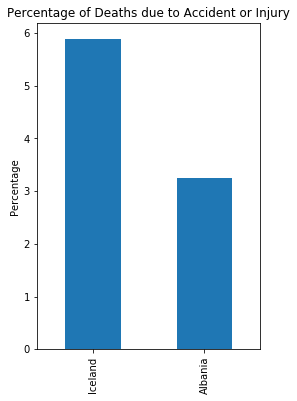

In [31]:
# Creates a dataframe for deaths by percentages
deaths_pct = pd.DataFrame([isl_pct_deaths_ext,alb_pct_deaths_ext],
                index=['Iceland', 'Albania'],
                columns=['Pct'])

# Displays a bar chart for deaths by percentages
deaths_pct.plot(figsize=(4,6), kind="Bar", legend=None, )
plt.ylabel("Percentage")
plt.title("Percentage of Deaths due to Accident or Injury")
plt.show()

<strong><center><small>Chart 4 - Percentage of Deaths by Accident and Injury in 2009 for Iceland and Albania</small></center></strong>

#### Discussion

Overall, Albania had roughly 13.8 times as many overall deaths, yet only 7.6 times as many deaths from accidents. If poverty had no impact, we would expect to see roughly the same ratios of overall deaths and deaths due to accidents and injury. However, from chart 4 we can see that there are almost half of the deaths due to accident and injury in Albania than there are in Iceland. This was an unexpected result, as initially it would be reasonable to assume that countries with lower overall income would also have more deaths due to accidents and injuries. In this case, we see the opposite. Iceland, despite having a better performing economy, has almost double the percentage of people dying from accidents and injuries.

This result could be explained in a number of ways. The reporting of causes of death varies in each country, and how the deaths are coded could be substantially different. For the data from Albania, we can see that almost all of the deaths due to accident and injury come from one code, `CH171`.

In [32]:
alb_2009_ext.head(1)

Cause
CH17    891
Name: Deaths1, dtype: int64

This code in the ICD9-BTL revision is only applied where the data do not contain a breakdown of external deaths causes for codes B47 to B56 (WHO 2015 p.33). For 2009, Iceland was using the 104 ICD revision. The differences in coding could be the cause of the differences in percentages. 

It could also however be a valid result that does represent what is happening in the broader population. This could be investigated by looking at the data for the other years, and by doing statistical hypothesis testing.

---
## Conclusion

The current leading causes for deaths by accident and injury were found to be, in order: 

- Intentional self-harm by hanging, strangulation and suffocation, 
- Unspecified fall,
- Exposure to unspecified factor causing fracture,
- Poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified, - undetermined intent
- Intentional self-poisoning.

Altogether, these five causes made up just under half of all deaths by accident and injury.

Over a thirty year period from 1979-2009, the number of deaths by accident and injury have steadily declined. This may or may not be an actual decrease in deaths however, as the death code reporting conventions changed multiple times during this period, which may account for these changes.

Analysis showed that some groups were more susceptible to death by accident and injury than others. Youths were not at all affected by falls and fractures, while males of all ages were shown to be at a much higher risk of intentional self-harm by hanging, strangulation and suffocation.

Poverty rates were shown to have reduced death rates by accident and injury for the countries investigated, which were Albania and Iceland. Albania showed almost half of the percentage of deaths at 3.2%, while Iceland had a rate of 5.9%. The reasons for this could be due to the differences in reporting deaths or simply a small sample size.

Although each research question was answered in accordance to the requirements of this report, there are a number of avenues for further research that would enrich the analysis done here. Placing the results of this analysis into a broader context of other countries would help to see if Iceland is in line with global averages or if it is an outlier.

---
## References

Central Intelligence Agency 2017a, _The World Factbook Albania_, viewed 10 October 2017 <https://www.cia.gov/library/publications/the-world-factbook/geos/al.html> 

Central Intelligence Agency 2017b, _The World Factbook Iceland_, viewed 7 October 2017 <https://www.cia.gov/library/publications/the-world-factbook/geos/ic.html> 

World Health Organization 2017a, _Cardiovascular Diseases_, viewed 8 October 2017 <http://www.who.int/mediacentre/factsheets/fs317/en/> 

World Health Organization 2017b, _Classifications_, viewed 8 October 2017 <http://www.who.int/classifications/icd/en/> 

World Health Organization 2017c, _Health Statistics and Information Systems_, viewed 9 October 2017 <http://www.who.int/healthinfo/statistics/mortality_rawdata/en/> 

World Health Organization 2016, _ICD-10 Version:2016_, viewed 8 October 2017 <http://apps.who.int/classifications/icd10/browse/2016/en> 

World Health Organization, 2014, Injuries and Violence: The Facts 2014.

World Health Organization, 2013, LMIC-HIC Country Grouping.

World Health Organization, 2015, WHO Mortality Data Base Documentation.

World Health Organization 2017d, _World Health Organization Iceland_, viewed 7 October 2017 <http://www.who.int/countries/isl/en/> 

United Nations Development Program 2017, _Human Development Index_, viewed 10 October 2017 <http://hdr.undp.org/en/composite/HDI> 

---
## Appendices 

### Appendix A

#### Codes for Deaths Classified as due to Injury or Violence

The following is a table of the codes for deaths that have been classified as deaths due to injury or violence for this report (WHO 2015).

|ICD7-A List Code|Cause |
|:----|:-----|
|A138 |Motor Vehicle Accidents|
|A139 |Other transport accidents|
|A140 |Accidental poisoning|
|A141 |Accidental falls|
|A142 |Accident caused by machinery|
|A143 |Accident caused by fire and explosion of combustible material|
|A144 |Accident caused by hot substance, corrosive liquid, steam, and radiation|
|A145 |Accident caused by firearm|
|A146 |Accidental drowning and submersion|
|A147 |All other accidental causes|
|A148 |Suicide and self-inflicted injury|
|A149 |Homicide and injury purposely inflicted by other persons (not in war)|
|A150 |Injury resulting from operations of war|
||||
|__ICD7-B List Code__|__Cause__ |
|B047 |Motor vehicle accidents|
|B048 |All other accidents|
|B049 |Suicide and self-inflicted injury|
|B050 |Homicide and operations of war|
||||
|__ICD8-A Code__|__Cause__ |
|A138 |Motor Vehicle Accidents|
|A139 |Other transport accidents|
|A140 |Accidental poisoning|
|A141 |Accidental falls|
|A142 |Accidents caused by fires|
|A143 |Accidental drowning and submersion|
|A144 |Accident caused by firearm missiles|
|A145 |Accidents mainly of industrial type|
|A146 |All other accidents|
|A147 |Suicide and self inflicted injury|
|A148 |Homicide and injury purposely inflicted by other persons; legal intervention|
|A149 |Injury undetermined whether accidentally or purposely inflicted|
|A150 |Injury resulting from operations of war|
||||
|__ICD8-B Code__|__Cause__ |
|B047 |Motor vehicle accidents|
|B048 |All other accidents|
|B049 |Suicide and self-inflicted injury|
|B050 |All other external causes|
||||
|__ICD9-BTL Code__|__Cause__ |
|B47  |Transport accidents|
|B470 |Railway accidents|
|B471 |Motor vehicle traffic accidents|
|B472 |Other road vehicle accidents|
|B473 |Water transport accidents|
|B474 |Air and space transport accidents|
|B479 |Remainder of B47|
|B48  |Accidental poisoning|
|B480 |Accidental poisoning by drugs, medicaments and biologicals|
|B481 |Accidental poisoning by other solid and liquid substances|
|B482 |Accidental poisoning by gases and vapours|
|B49  |Misadventures during medical care, abnormal reactions, late complications|
|B50  |Accidental falls|
|B51  |Accidents caused by fire and flames|
|B52  |Other accidents, including late effects|
|B520 |Accidents due to natural and environmental factors|
|B521 |Accidental drowning and submersion|
|B522 |Foreign body accidentally entering orifice|
|B523 |Accidents caused by machinery, and by cutting and piercing instruments|
|B524 |Accidents caused by firearm missile|
|B529 |Remainder of B52|
|B53  |Drugs, medicaments causing adverse effects in therapeutic use|
|B54  |Suicide and self-inflicted injury|
|B55  |Homicide and injury purposely inflicted by other persons|
|B56  |Other violence|
|B560 |Injury undetermined whether accidentally or purposely inflicted|
|B561 |Injury resulting from operation of war|
|B569 |Remainder of B56|
|CH17 |Injury and Poisoning|
||||
|__ICD10 Code__|__Cause__ |
|1096 |Transport accidents|
|1097 |Falls|
|1098 |Accidental drowning and submersion|
|1099 |Exposure to smoke, fire and flames|
|1100 |Accidental poisoning by and exposure to noxious substances|
|1101 |Intentional self-harm|
|1102 |Assault|
|1103 |All other external causes|

For IDC10 the detailed list codes for all external causes range from V00-Y89 (WHO 2015 p.41). The causes can be found on the WHO website [here](http://apps.who.int/classifications/icd10/browse/2016/en) (WHO 2016)

|Detailed Codes|Causes|
|:--|:--| 
|V01-X59| Accidents| 
|X60-X84| Intentional self-harm|
|X85-Y09| Assault|
|Y10-Y34| Event of undetermined intent|
|Y35-Y36| Legal intervention and operations of war|
|Y40-Y84| Complications of medical and surgical care|  
|Y85-Y89| Sequelae of external causes of morbidity and mortality|
|Y90-Y98| Supplementary factors related to causes of morbidity and mortality classified elsewhere|